In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Load the data
data = pd.read_csv('/Users/yachu/Downloads/OneDrive_1_4-8-2024/train_data.csv')

In [10]:
# Replace '20-Nov' with '11-20' in the 'Stay' column
data['Stay'] = data['Stay'].str.replace('20-Nov', '11-20')

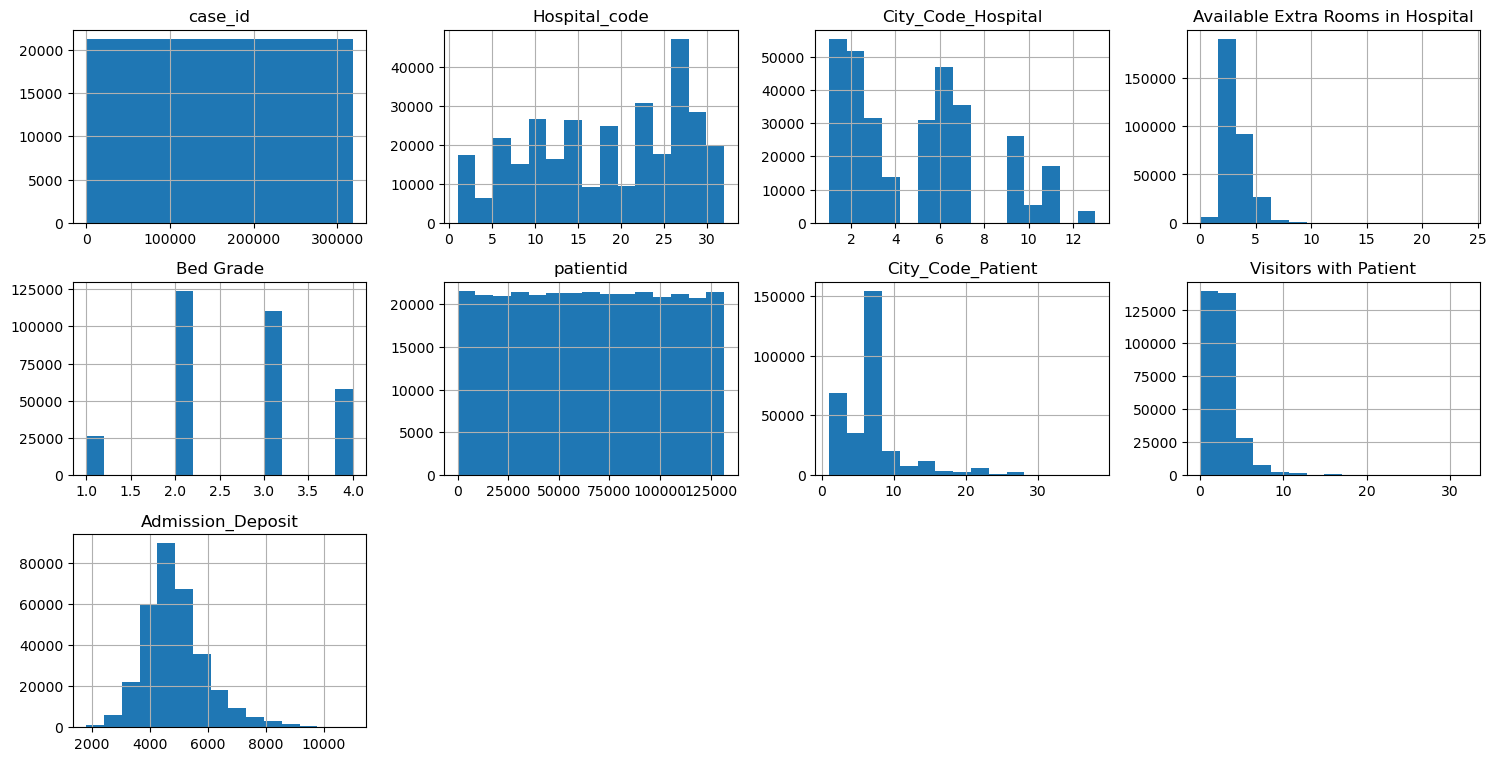

In [11]:
# Exploratory Data Analysis (EDA)
# Histograms for numerical features
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

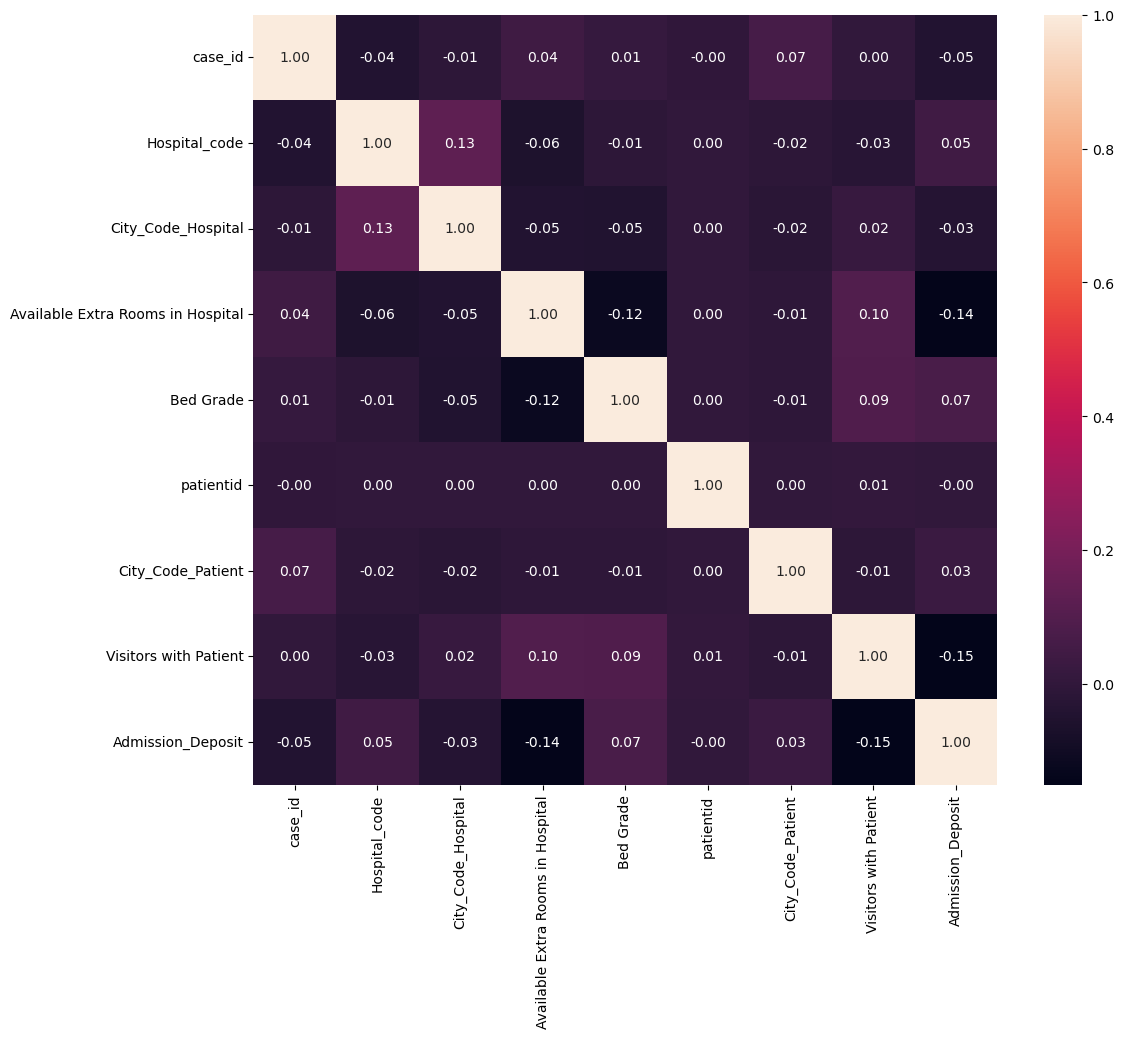

In [12]:
# Only compute the correlation matrix for numerical columns
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f')
plt.show()

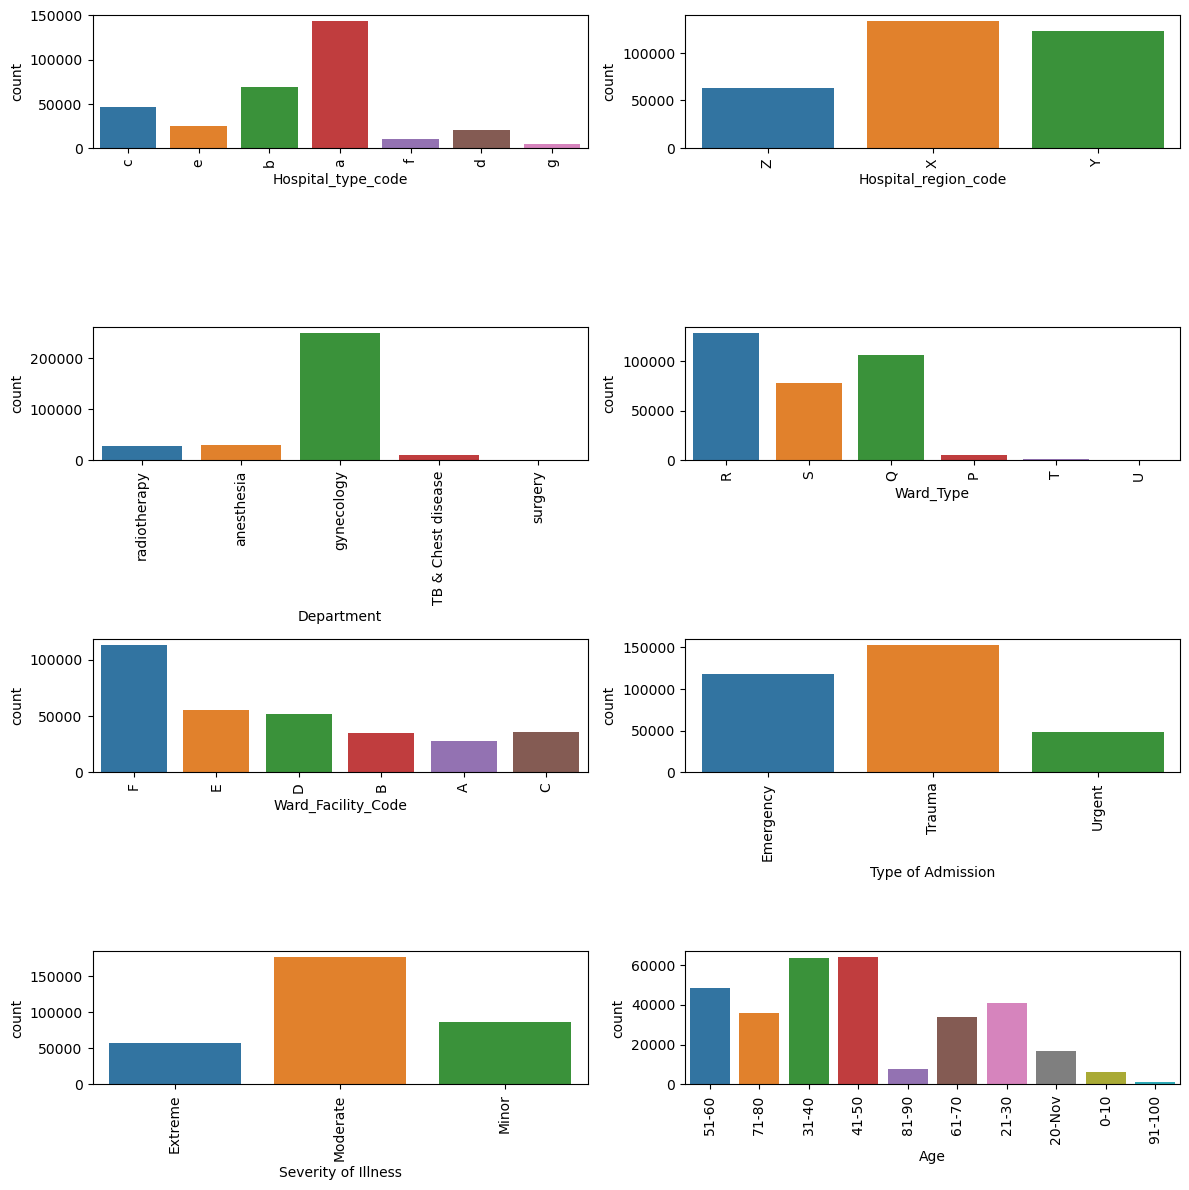

In [13]:

# Bar plots for categorical features
fig, axes = plt.subplots(round(len(data.select_dtypes(include=['object']).columns) / 2), 2, figsize=(12, 12))
for ax, feature in zip(axes.flatten(), data.select_dtypes(include=['object']).columns):
    sns.countplot(x=feature, data=data, ax=ax)
    ax.tick_params(axis='x', rotation=90)
fig.tight_layout()
plt.show()

In [14]:
# Preprocessing and Model Training
# Separate target from features
y = data['Stay']
X = data.drop(['Stay', 'case_id', 'patientid'], axis=1)


In [15]:
# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [16]:
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [17]:
# Create a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)])

In [18]:
# Define the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)

In [19]:
# Create a pipeline that executes the preprocessor and then the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rf_model)])

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Define hyperparameters for grid search
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
}

In [22]:
# Execute grid search on the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [23]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  21.9s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100; total time=  22.4s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=  41.7s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time= 1.2min
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time= 1.0min
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  22.7s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=  45.0s
[CV] END model__max_depth=10, model_

/Users/yachu/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=  43.0s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100; total time=  21.8s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100; total time=  21.4s
[CV] END model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time= 1.2min
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100; total time=  31.1s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100; total time=  30.2s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=  23.1s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_est

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient',
       'Visitors with Patient', 'Admission_Deposit'],
      dtype='obj...
                                                                         Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [25]:

# Print the best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best grid search score: {grid_search.best_score_}")

Best parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best grid search score: 0.41388419375267177


In [26]:
# Evaluate the model on the testing set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.4212253485742997


In [27]:

# Replace '20-Nov' with '11-20' in predictions and y_test
y_test_str = y_test.str.replace('20-Nov', '11-20')
predictions_str = pd.Series(predictions).replace('20-Nov', '11-20')

In [28]:
# Print the classification report with corrected labels
print(classification_report(y_test_str, predictions_str))

                    precision    recall  f1-score   support

              0-10       0.41      0.13      0.20      4713
             11-20       0.42      0.49      0.45     15672
             21-30       0.42      0.66      0.51     17495
             31-40       0.43      0.24      0.31     10941
             41-50       0.67      0.00      0.00      2338
             51-60       0.41      0.52      0.46      6964
             61-70       1.00      0.00      0.00       572
             71-80       0.40      0.02      0.04      2099
             81-90       0.45      0.09      0.16       991
            91-100       0.58      0.01      0.02       570
More than 100 Days       0.55      0.43      0.48      1333

          accuracy                           0.42     63688
         macro avg       0.52      0.24      0.24     63688
      weighted avg       0.44      0.42      0.38     63688



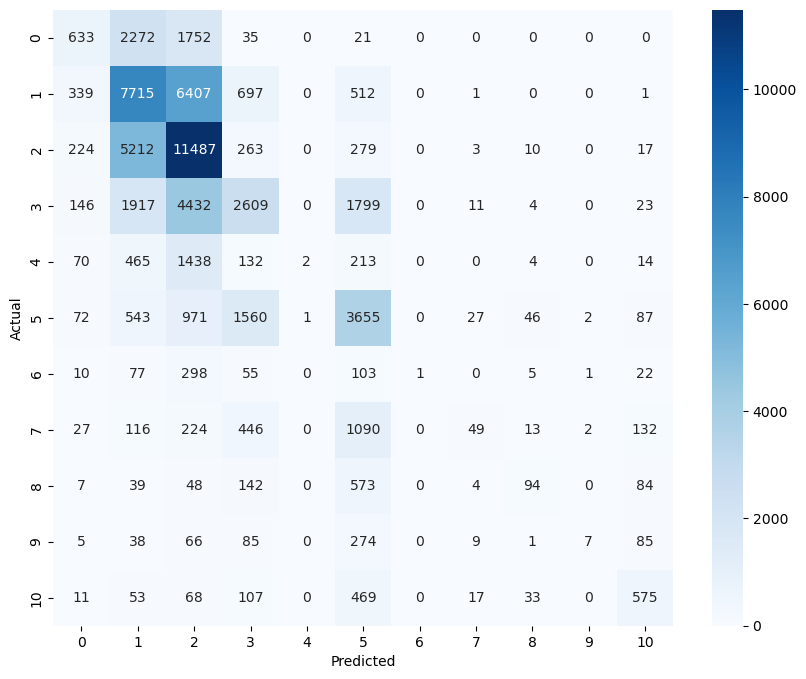

In [29]:
# Visualizing Model Predictions
# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_str, predictions_str)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

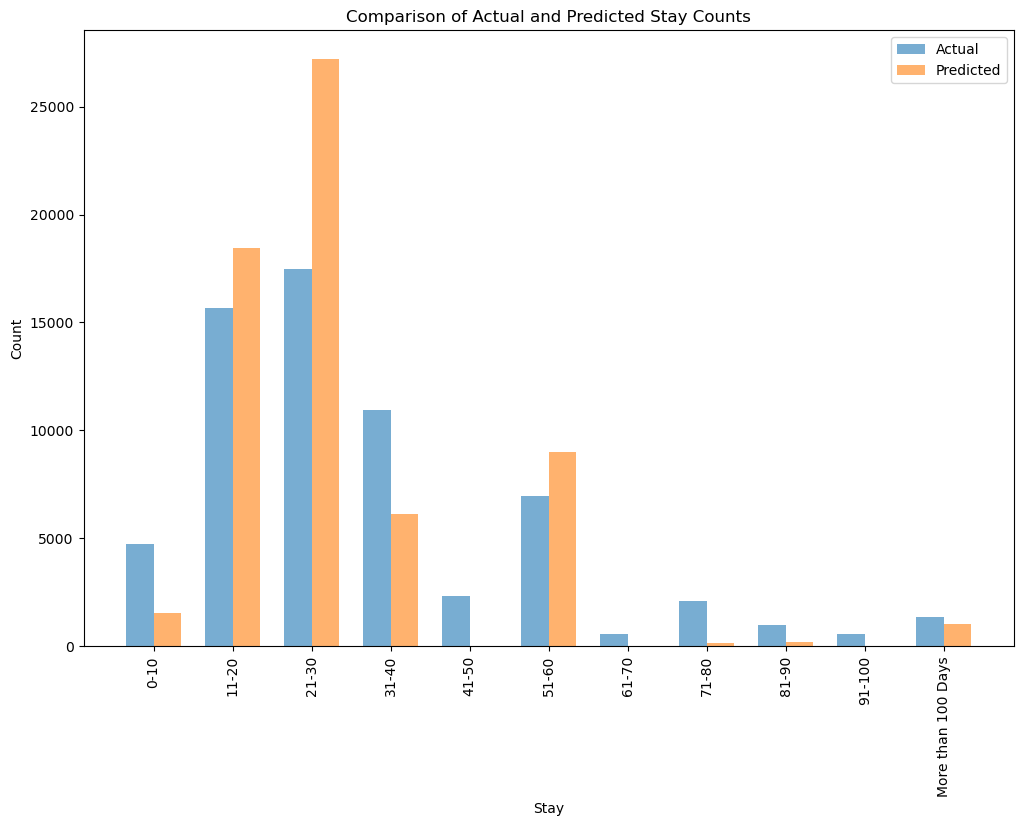

In [30]:
# Comparison of actual and predicted values
true_counts = y_test_str.value_counts().sort_index()
predicted_counts = predictions_str.value_counts().sort_index()
bar_width = 0.35
index = np.arange(len(true_counts))
fig, ax = plt.subplots(figsize=(12, 8))
actual_bar = ax.bar(index, true_counts, bar_width, label='Actual', alpha=0.6)
predicted_bar = ax.bar(index + bar_width, predicted_counts, bar_width, label='Predicted', alpha=0.6)
ax.set_xlabel('Stay')
ax.set_ylabel('Count')
ax.set_title('Comparison of Actual and Predicted Stay Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(true_counts.index, rotation=90)
ax.legend()
plt.show()